In [0]:
import tensorflow
from matplotlib import pyplot as plt
import PIL
from PIL import Image
import os
import pandas as pd
import cv2
import numpy as np
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data=np.load("/content/drive/My Drive/gpu/data_array.npy")

In [0]:
data.shape

(7355, 128, 128)

# data preprocessing

In [0]:
train_data=data[0:6000]
test_data=data[6000:]
train_data=train_data.astype('float32')
test_data=test_data.astype('float32')


In [0]:
train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)


In [0]:
train_data = train_data.reshape(-1, 128,128, 1)
test_data = test_data.reshape(-1, 128,128, 1)
train_data.shape, test_data.shape


((6000, 128, 128, 1), (1355, 128, 128, 1))

#use of new dataset formal

In [0]:
img_width, img_height = 128, 128
batch_size = 50
datagen = ImageDataGenerator(rescale=1./255)
train_data_dir = '/content/drive/My Drive/gpu/output/train'
validation_data_dir = '/content/drive/My Drive/gpu/output/val'

In [0]:
# os.chdir("/content/drive/My Drive/gpu/output")
# !ls

In [0]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 50

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        color_mode='grayscale',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='input',
        shuffle=False)

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        color_mode='grayscale',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='input',
        shuffle=False)

Found 5502 images belonging to 2 classes.
Found 1835 images belonging to 2 classes.


In [0]:
train_samples=5502
validation_samples=1835


In [0]:

epochs = 10
img_channel = 1
x, y = 128, 128
input_img = Input(shape = (x, y, img_channel))


In [0]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x= MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded= MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(img_channel, (3, 3), activation='sigmoid', padding='same')(x) # example from documentaton

autoencoder = Model(input_img, decoded)
# autoencoder.summary() # show model data

autoencoder.compile(optimizer='SGD',loss='mean_squared_error')

In [0]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 16)        2320

In [0]:
load_auto=load_model('/content/drive/My Drive/gpu/my_model.h5')

In [0]:
autoencoder_train = autoencoder.fit_generator(train_generator,steps_per_epoch=train_samples // batch_size,epochs=5,verbose=1,validation_data=validation_generator,validation_steps=validation_samples/batch_size)




Epoch 1/5


KeyboardInterrupt: ignored

In [0]:
# load_auto.summary()

In [0]:
encoder=Model(load_auto.input,load_auto.layers[10].output)

In [0]:
# auto=autoencoder.fit_generator(
#         train_generator,
#         steps_per_epoch=train_samples // batch_size,
#         epochs=300,
#         workers=200,
#         use_multiprocessing=True,
#         validation_data=validation_generator,
#         validation_steps=validation_samples// batch_size)
# #About 60 seconds an epoch when using CPU

In [0]:
autoencoder.save('/content/drive/My Drive/gpu/my_model.h5')

In [0]:
import matplotlib.pyplot as plt
import numpy as np
images_show_start = 1
images_show_stop = 20
images_show_number = images_show_stop - images_show_start +1

images,_ = train_generator.next()


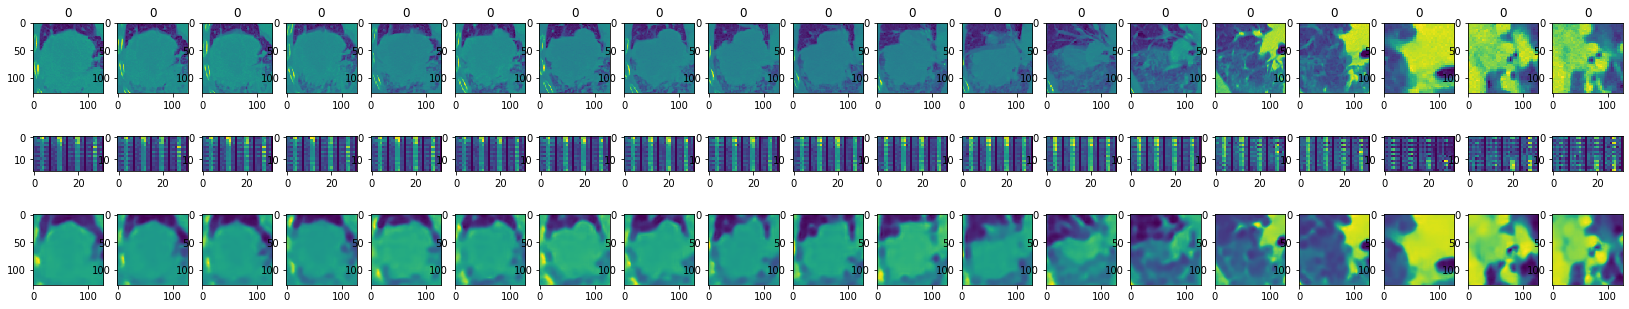

In [0]:
plt.figure(figsize=(30, 5))
for i in range(images_show_start, images_show_stop):
    # original image
    ax = plt.subplot(3, images_show_number, i +1)
    image = images[i,:,:,0]
    image_reshaped = np.reshape(image, [1,128, 128, 1])
    plt.imshow(image)

    # label
    image_label = os.path.dirname(validation_generator.filenames[i])
    plt.title(image_label) # only OK if shuffle=false

    # encoded image
    ax = plt.subplot(3, images_show_number, i + 1+1*images_show_number)
    image_encoded = encoder.predict(image_reshaped)
     # adjust shape if the network parameters are adjusted
    image_encoded_reshaped = np.reshape(image_encoded, [16,32])
    plt.imshow(image_encoded_reshaped)

    # predicted image
    ax = plt.subplot(3, images_show_number, i + 1+ 2*images_show_number)
    image_pred = load_auto.predict(image_reshaped)
    image_pred_reshaped = np.reshape(image_pred, [128,128])
    plt.imshow(image_pred_reshaped)
plt.show()

In [0]:
images_show_start = 1
images_show_stop = 20
images_show_number = images_show_stop - images_show_start +1

images,_ = validation_generator.next()

In [0]:
train_generator1 = datagen.flow_from_directory(
        train_data_dir,
        color_mode='grayscale',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='input',
        shuffle=False)

validation_generator1 = datagen.flow_from_directory(
        validation_data_dir,
        color_mode='grayscale',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='input',
        shuffle=False)

Found 5502 images belonging to 2 classes.
Found 1835 images belonging to 2 classes.


In [0]:
encoded_image_train=encoder.predict_generator(train_generator1,steps=train_samples/batch_size)

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


KeyboardInterrupt: ignored

In [0]:
np.save('/content/drive/My Drive/gpu/encoded_image_train',encoded_image_train)

In [0]:
encoded_image_val=encoder.predict_generator(validation_generator,steps=validation_samples/batch_size)

KeyboardInterrupt: ignored

In [0]:
np.save('/content/drive/My Drive/gpu/encoded_image_val',encoded_image_val)

In [0]:
train_label=train_generator1.classes
val_label=validation_generator1.classes

In [0]:
encoded_image_val.shape

(1835, 8, 8, 8)

**set training and testing label**

In [0]:
encoded_image_train=np.load('/content/drive/My Drive/gpu/encoded_image_train.npy')

In [0]:
encoded_image_train_flatten=encoded_image_train.reshape(-1,512)

In [0]:
encoded_train=pd.DataFrame(encoded_image_train_flatten)

In [0]:
encoded_train['label']=train_generator1.classes

In [0]:
encoded_train['id']=train_generator1.filenames

In [0]:
encoded_train.to_csv('/content/drive/My Drive/gpu/encoded_train.csv')

In [0]:
encoded_image_val=np.load('/content/drive/My Drive/gpu/encoded_image_val.npy')

In [0]:
encoded_image_val_flatten=encoded_image_val.reshape(-1,512)
encoded_val=pd.DataFrame(encoded_image_val_flatten)
encoded_val['label']=validation_generator1.classes
encoded_val['id']=validation_generator1.filenames

In [0]:
encoded_val.to_csv('/content/drive/My Drive/gpu/encoded_val.csv')

**add to a fully-connected layer**

In [0]:
encode_img_flat=encode_img.reshape(-1,512)

NameError: ignored

In [0]:
encoded_image_train.shape

(5502, 8, 8, 8)

In [0]:
top_model=Sequential()
top_model.add(Flatten(input_shape=(8,8,8)))
top_model.add(Dense(32, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

In [0]:
top_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 16,449
Trainable params: 16,449
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True,clipvalue = 0.5)
adam=Adam(lr=0.1)
top_model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
top_model.fit(encoded_image_train, train_label, batch_size=batch_size,epochs=100,verbose=1,validation_data=(encoded_image_val, val_label))

5502/5502 [==============================] - 1s 107us/step - loss: 0.6355 - acc: 0.6554 - val_loss: 0.6548 - val_acc: 0.6550
Epoch 17/100
5502/5502 [==============================] - 1s 101us/step - loss: 0.6341 - acc: 0.6559 - val_loss: 0.6581 - val_acc: 0.6550
Epoch 18/100
5502/5502 [==============================] - 1s 105us/step - loss: 0.6337 - acc: 0.6576 - val_loss: 0.6569 - val_acc: 0.6550
Epoch 19/100
5502/5502 [==============================] - 1s 99us/step - loss: 0.6327 - acc: 0.6558 - val_loss: 0.6512 - val_acc: 0.6550
Epoch 20/100
2650/5502 [=============>................] - ETA: 0s - loss: 0.6334 - acc: 0.6540

KeyboardInterrupt: ignored

In [0]:
top_model.predict(encoded_image_val)[1]

array([0.36168855], dtype=float32)

In [0]:
top_model.evaluate(encoded_image_train,train_label)

5502/5502 [==============================] - 0s 41us/step


[0.6384148206419618, 0.6548527808069793]

In [0]:
top_model.evaluate(encoded_image_val,val_label)

1835/1835 [==============================] - 0s 43us/step


[0.647215233901541, 0.6550408719346049]

In [0]:
train_pred=top_model.predict(encoded_image_train)
df = pd.DataFrame({
    'filename':train_generator1.filenames,
    'predict':train_pred[:,0],
    'y':train_generator1.classes
})
df.head(100)
df.to_csv('/content/drive/My Drive/gpu/train_outcome.csv')

In [0]:
# validation_set=validation_generator1.reset
validation_pred=top_model.predict(encoded_image_val)
df = pd.DataFrame({
    'filename':validation_generator1.filenames,
    'predict':validation_pred[:,0],
    'y':validation_generator1.classes
})


In [0]:
validation_set

<bound method Iterator.reset of <keras_preprocessing.image.directory_iterator.DirectoryIterator object at 0x7f25cbf43128>>

**i DON'T WANT TO USE IMAGE GENERATOR! I WILL USE IMAGE ARRAY!!!!**

In [0]:
img_width, img_height = 128, 128
batch_size = 50
train_data_dir = '/content/drive/My Drive/gpu/output/train'
validation_data_dir = '/content/drive/My Drive/gpu/output/val'
train_0_dir='/content/drive/My Drive/gpu/output/train/0'
train_1_dir='/content/drive/My Drive/gpu/output/train/1'
val_0_dir='/content/drive/My Drive/gpu/output/val/0'
val_1_dir='/content/drive/My Drive/gpu/output/val/1'


**fine-tune on encoded images**

In [0]:
train_image_csv=pd.read_csv('/content/drive/My Drive/gpu/encoded_train.csv')
val_image_csv=pd.read_csv('/content/drive/My Drive/gpu/encoded_val.csv')

In [0]:
x_train=(train_image_csv.iloc[:,1:513].values).astype('float32')
y_train = train_image_csv.iloc[:,513].values.astype('int32')
x_test=(val_image_csv.iloc[:,1:513].values).astype('float32')
y_test = val_image_csv.iloc[:,513].values.astype('int32')


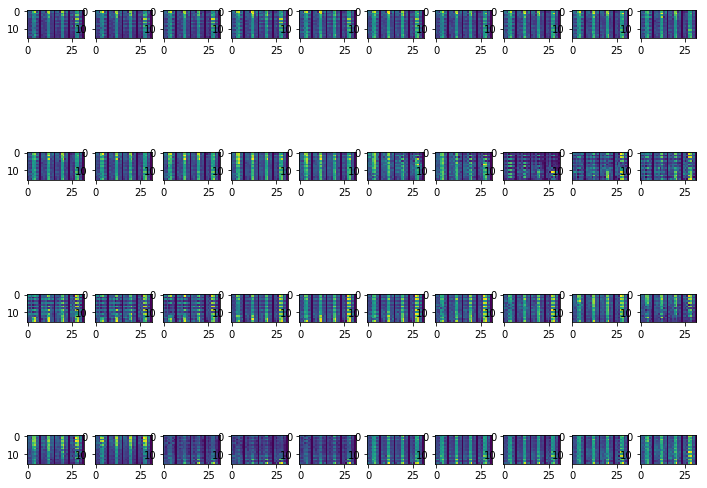

In [0]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((16,32)),interpolation='nearest')
plt.show()

In [0]:
X_train = x_train.reshape(x_train.shape[0], 16, 32,1)
X_test = x_test.reshape(x_test.shape[0], 16, 32,1)

In [0]:
y_train[1]

0

In [0]:
from keras.utils import to_categorical
y_train_binary=to_categorical(y_train,2)
y_test_binary=to_categorical(y_test,2)

In [0]:
y_train_binary[1].shape

(2,)

In [0]:
batch_size = 64
epochs = 100
input_shape = (16, 32, 1)

In [0]:
input_shape

(16, 32, 1)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(16,32,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 14, 30, 32)        320       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 12, 28, 128)       36992     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 6, 14, 128)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 6, 14, 128)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 10752)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               1376384   
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
__________

In [0]:
model.layers[1].input

<tf.Tensor 'conv2d_43/Relu:0' shape=(?, 14, 30, 32) dtype=float32>

In [0]:
batch_size = 128
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
adam=Adam(lr=0.1)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

In [0]:
y_test_binary[1]

array([1., 0.], dtype=float32)

4

In [0]:
num_classes

10

In [0]:
model.fit(X_train,y_train_binary,epochs=300,verbose=1,batch_size=batch_size,validation_data=(X_test,y_test_binary))

In [0]:
k=model.predict(X_test)

In [0]:
len(k[k>=0.5])

1835

In [0]:
len(k[k<0.5])

1835

In [0]:
p=k[k<0.5]

In [0]:
len(p)

1835

In [0]:
k[1]

array([0.0103543, 0.9896457], dtype=float32)